# VAE Evaluation Notebook
This notebook loads a trained BetaVAE and evaluates reconstructions, KL, and latent traversals.


In [ ]:
from src.vae.evaluate_run import load_vae, val_loader_from_yaml, basic_metrics, mu_variance, plot_recon, latent_traverse, pca_traverse

# Set paths

project_name = 'celebA-vae'
run_name = 'beta5-test'

run_dir = f'runs/{project_name}/{run_name}'

In [2]:
# Prepare validation loader

vae, train_cfg, device = load_vae(run_dir)

# pick the 'val' split from the same data.yaml you used to train
in_ch     = vae.config.encoder.in_channels
img_size  = vae.config.img_size
data_yaml = train_cfg.data_yaml
bs        = train_cfg.batch_size

val_loader = val_loader_from_yaml(
    data_yaml = data_yaml,
    img_size  = img_size,
    in_ch     = in_ch,
    bs        = bs
)


In [3]:
# Basic MSE and KL metrics
basic_metrics(vae, val_loader, device)


MSE(x, recon_mu):   0.129526
MSE(x, recon_zero): 0.409526
True KL  (mean):    118.609886
Budgeted KL (mean): 118.609886



In [4]:
# μ‐variance across validation set
# mus = mu_variance(vae, val_loader, device)


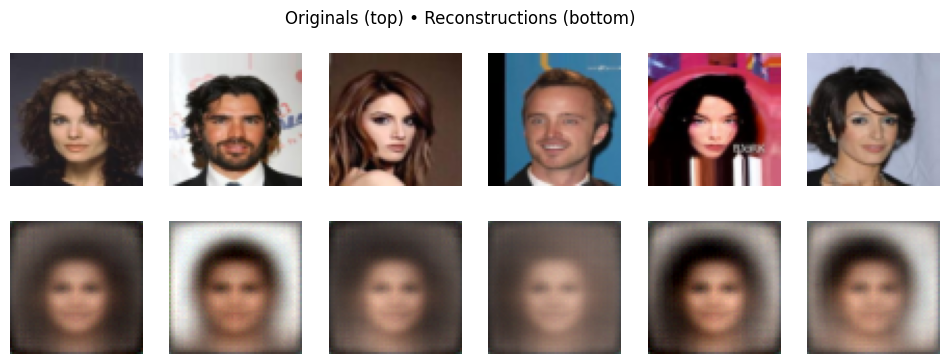

In [5]:
# Plot reconstructions
plot_recon(vae, val_loader, device, n=6)


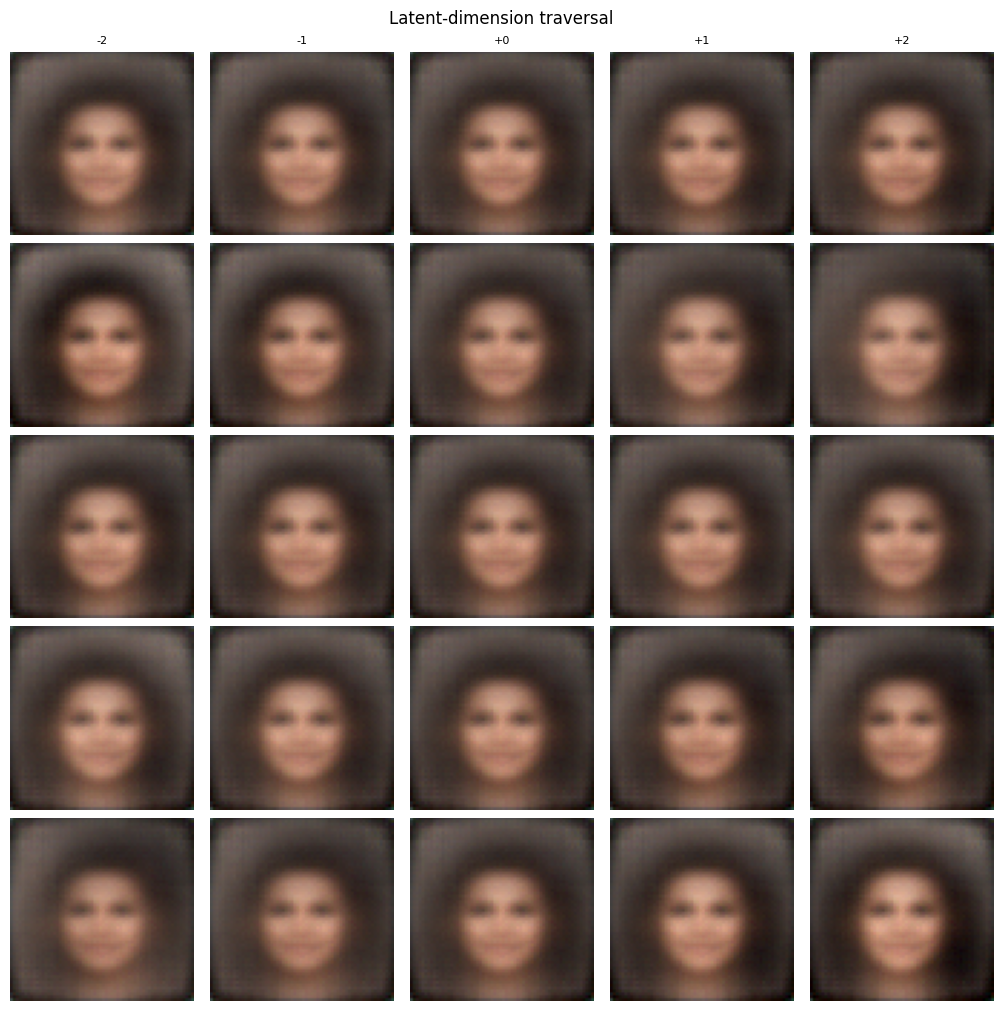

In [6]:
# Latent dimension traversal
latent_traverse(
    vae, val_loader, device, 
    dims=5, scale=3.0
    )


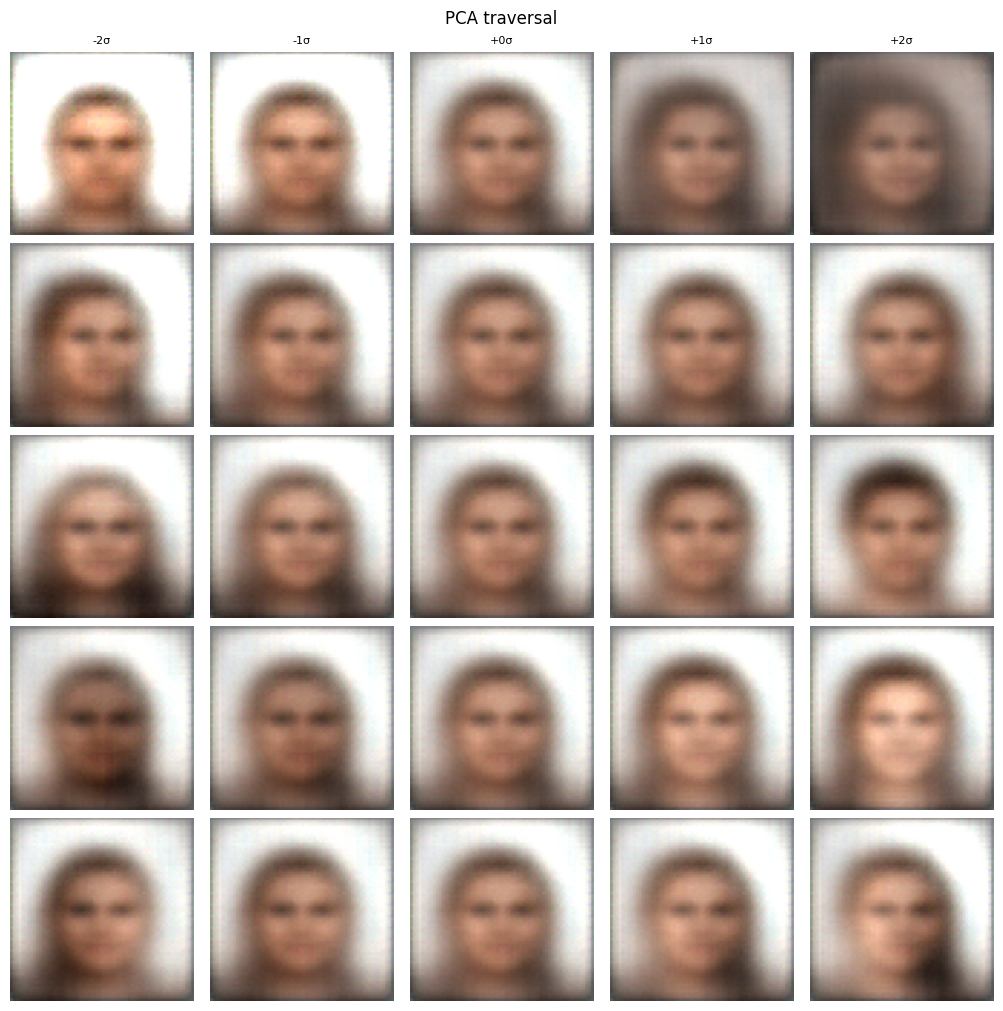

In [7]:
# PCA-based traversal
pca_traverse(
    vae, val_loader, device, 
    n_pcs=5, scale=1.0
    )


In [8]:
from src.vae.evaluate_run import (
    get_all_latents, compute_latent_stats,
    plot_pca_3d_interactive, posterior_histogram, 
    plot_latent_stats_heatmap
)

mu, logvar = get_all_latents(vae, val_loader, device)
stats      = compute_latent_stats(mu, logvar)


ImportError: cannot import name 'posterior_histogram' from 'src.vae.evaluate_run' (/home/tonso/code/00--research/latent-reason/src/vae/evaluate_run.py)

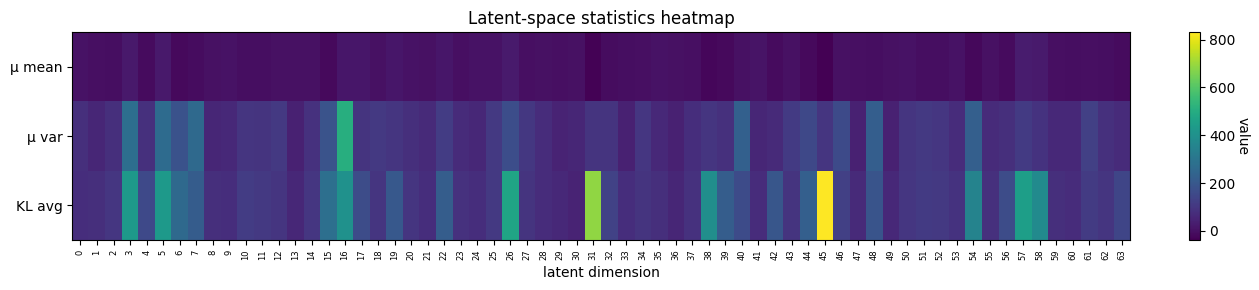

In [ ]:
plot_latent_stats_heatmap(stats)



In [ ]:
plot_pca_3d_interactive(mu)


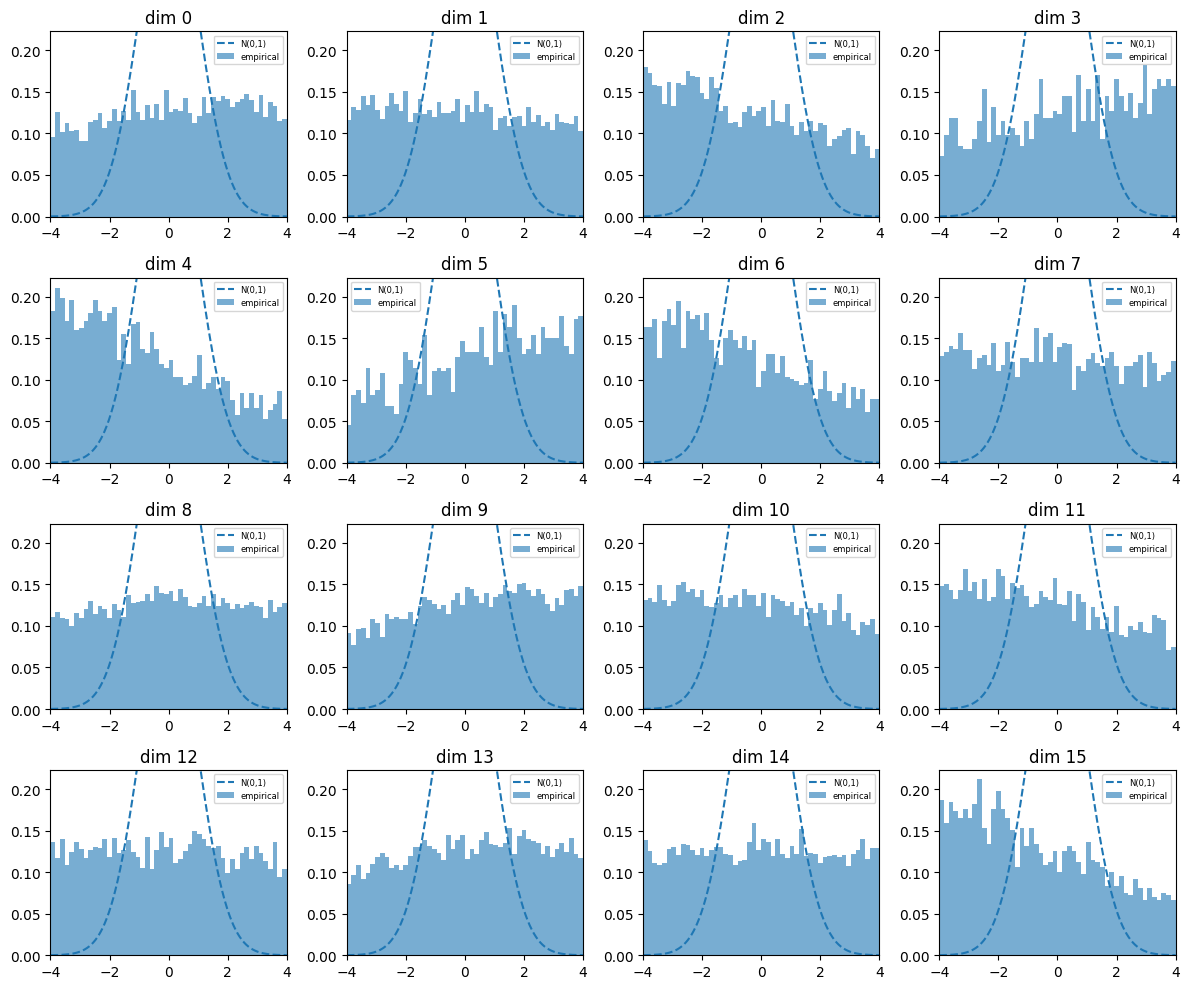

In [ ]:
posterior_histogram(mu, max_dims=16)
